In [7]:
import pandas as pd
import numpy as np
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS 

In [2]:
recomendacoes=pd.read_csv('dados/recomendacao.csv', sep = ';')
recomendacoes

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,45331,A-582/CENIPA/2014 - 01,2016-07-29,2016-08-25,2016-12-20,Atuar junto às empresas que operam segundo o R...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1,45331,A-582/CENIPA/2014 - 02,2016-07-29,2016-08-25,2016-12-20,Atuar junto à Administração do Aeroporto Inter...,CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
2,45331,A-582/CENIPA/2014 - 03,2016-07-29,2016-08-25,NaN,Orientar as suas organizações subordinadas em ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO
3,45392,A-032/CENIPA/2014 - RSV 001,2014-04-07,2015-04-14,2015-08-21,Divulgar aos operadores de helicópteros vincul...,CUMPRIDA DE FORMA ALTERNATIVA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
4,45392,A-032/CENIPA/2014 - RSV 002,2014-04-07,2015-04-14,2015-08-17,Tendo em vista os fatos levantados nesta inves...,NÃO CUMPRIDA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
...,...,...,...,...,...,...,...,...,...
1192,79713,A-146/CENIPA/2020 - 02,2021-07-08,2021-07-26,NaN,Atuar junto à empresa Plá e Silva Aviação Agrí...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1193,79713,A-146/CENIPA/2020 - 03,2021-07-08,2021-07-26,NaN,Divulgar os ensinamentos colhidos na presente ...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1194,80073,A-063/CENIPA/2021 - 01,2021-11-12,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL
1195,80073,A-063/CENIPA/2021 - 02,2021-11-12,2021-11-19,NaN,Divulgar os ensinamentos colhidos nesta invest...,AGUARDANDO RESPOSTA,ANAC,AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL


# Observação da relevância das palavras no conteúdo das recomendações.

In [11]:
def nuvem_palavras(coluna_dataframe):
    
    palavras = ''
    stopwords= set(STOPWORDS)

    # Lista de palavras que não serão contabilizadas
    novas_palavras = ["de", "da", "do", "para", "dos", "das", 
                     "em", "por", "registro", "ltda", "fim", "realizar",
                     "um", "através", "na", "no", "ou", "voo", "aeronave", "aeronaves"]

    with open("stop_words_pt.txt", 'r') as f:
        [novas_palavras.append(palavras) for linha in f for palavras in linha.split()]

    nova_stopwords = stopwords.union(novas_palavras)

    for val in coluna_dataframe: 

        # converter cada linha para string 
        val = str(val) 

        # splitar cada linha em uma lista de palavras (tokens)
        tokens = val.split() 

        # Converter cada token em letra minuscula
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 

        palavras += " ".join(tokens)+" "

    # Formando a nunvem de palavras    
    wordcloud = WordCloud(width = 500, height = 500, 
                    background_color ='white', 
                    stopwords = nova_stopwords, 
                    min_font_size = 10).generate(palavras) 

    # Plotando a imagem de nuvem de palavras                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show()

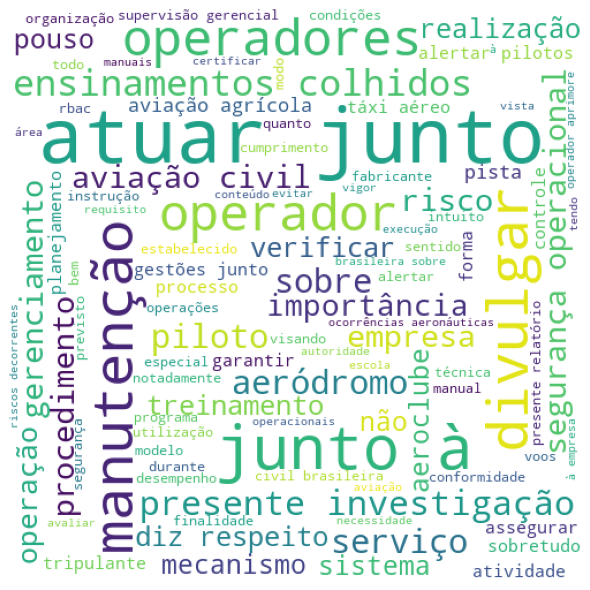

In [12]:
nuvem_palavras(recomendacoes['recomendacao_conteudo'])